# Introduction

## Aims and Goals

- The aim of this project is to investigate whether there is a correlation between the gross domestic product (GDP) of a country and the life expectancy of the people in their respective countries.

- The goal is to prepare and analyse the data using plots using Jupyter, and explain the findings from the study.

The following questions will provide answers to the aim of the project:
1. Does life expectancy increase over time across the six countries?
2. Does GDP increase over time across the six countries?
3. Is there a correlation between GDP and life expectancy of a country?
4. What is the average life expectancy of these countries?
5. What is the spread of that life expectancy?

## Data Sources
- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files
- Life expectancy data source: [WHO](https://apps.who.int/gho/data/node.main.688)

## Importing Python Modules

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## Loading and inspecting the CSV

In [3]:
df = pd.read_csv("all_data.csv")
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [5]:
df.head(10)

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
5,Chile,2005,78.4,1.229650e+11
6,Chile,2006,78.9,1.547880e+11
7,Chile,2007,78.9,1.736060e+11
8,Chile,2008,79.6,1.796380e+11
9,Chile,2009,79.3,1.723890e+11


## Exploring the Data

Identify the unique countries and years represented by the data.

In [7]:
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


There are a total of **6** countries: **Chile, China, Germany, Mexico, United States of America and Zimbabwe.**

In [8]:
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


The data ranges from **2000** to **2015**.

### Cleaning Column Name

The columns, Country, Year and GDP is easy to read, however the Life expectancy at birth (years) is too long. It will be easier to wrangle if the column name was shorter.

In [9]:
df = df.rename({"Life expectancy at birth (years)":"LEY"}, axis="columns")
df.head()

,Country,Year,LEY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## Exploratory Data Analysis

To answer the questions in the introduction, we can inspect the data by summarizing and visualising it. Below is the GDP distribution. The result shows heavy right-skewness, where most values are distributed to the left.

C:\Users\Jun-Wei\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

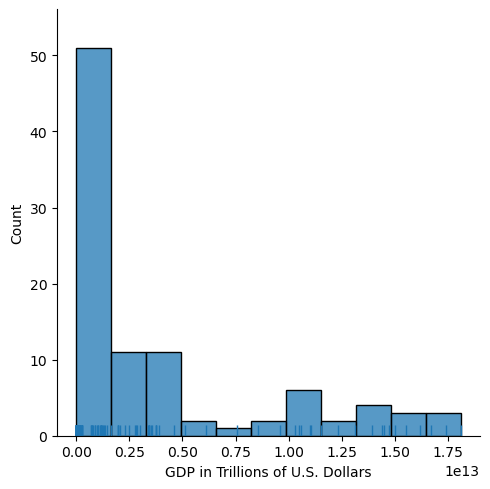

In [19]:
plt.figure(figsize=(10,8))
sns.displot(df.GDP, rug=True, kde=False)
plt.xlabel("GDP in Trillions of U.S. Dollars")
plt.show()

Below the distribution of LEY. The result displays heavy left-skewness, opposite to the GDP distribution plot. Furthermore, there seems to be three different modes of distribution groupings within the range.

C:\Users\Jun-Wei\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

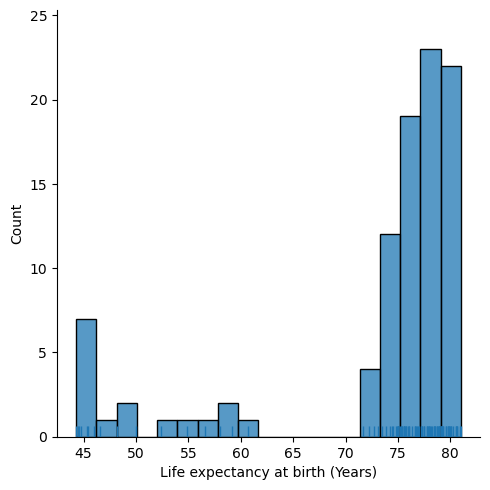

In [20]:
plt.figure(figsize=(8, 6))
sns.displot(df.LEY, rug=True, kde=False)
plt.xlabel("Life expectancy at birth (Years)")
plt.show()

Next, finding the average life expectancy and GDP by country.

In [21]:
dfMean = df.drop("Year", axis=1).groupby("Country").mean().reset_index()

In [22]:
dfMean

,Country,LEY,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09
